# AS HW4_5(2)

김보람  
2023-06-11

# ref

[python-data-analysis
data](https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv)

[Data Source](http://www.statiz.co.kr/)

# import

In [2]:
library(MASS) #lm.ridge 
library(car) #vif
library(caret) #예측
library(ggplot2)
library(glmnet) #Ridge, Lasso
library(tidyverse)

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-7

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()
✖ tidyr::unpack() masks Matrix::unpack()


In [3]:
get_high_vif_variables <- function(data, threshold) {
  vif_values <- vif(data)
  high_vif_variables <- names(vif_values[vif_values > threshold])
  return(high_vif_variables)
}

# 데이터셋

In [4]:
picher <- read.csv("~/Dropbox/coco/posts/Applied statistics/picher_stats_2017.csv")
head(picher)

In [5]:
dt2018 <- data.frame(new_col = picher$연봉.2018.)

In [6]:
dt2017 <- data.frame(new_col = picher$연봉.2017.)

In [7]:
dt <- subset(picher, select = -c(연봉.2017.,연봉.2018.))

In [8]:
head(dt)

In [9]:
dt <- cbind(dt, new_col = dt2017)
names(dt)[length(names(dt))] <- "연봉.2017."


In [10]:
dt <- cbind(dt, new_col = dt2018)
names(dt)[length(names(dt))] <- "연봉.2018."


In [11]:
head(dt)

In [12]:
dt <- subset(dt, select = -c(팀명,선수명))

In [13]:
head(dt)

# 회귀직선적합

## model1(원본)

In [14]:
model1 <- lm(연봉.2018. ~ ., dt)
summary(model1)

In [15]:
model1 <- lm(연봉.2018. ~ +WAR+연봉.2017., dt)
summary(model1)

In [16]:
vif(model1)

In [17]:
threshold <- 10

In [18]:
high_vif_vars <- get_high_vif_variables(model1, threshold)
print(high_vif_vars)

character(0)

In [19]:
threshold <- 15

In [20]:
high_vif_vars <- get_high_vif_variables(model1, threshold)
print(high_vif_vars)

character(0)

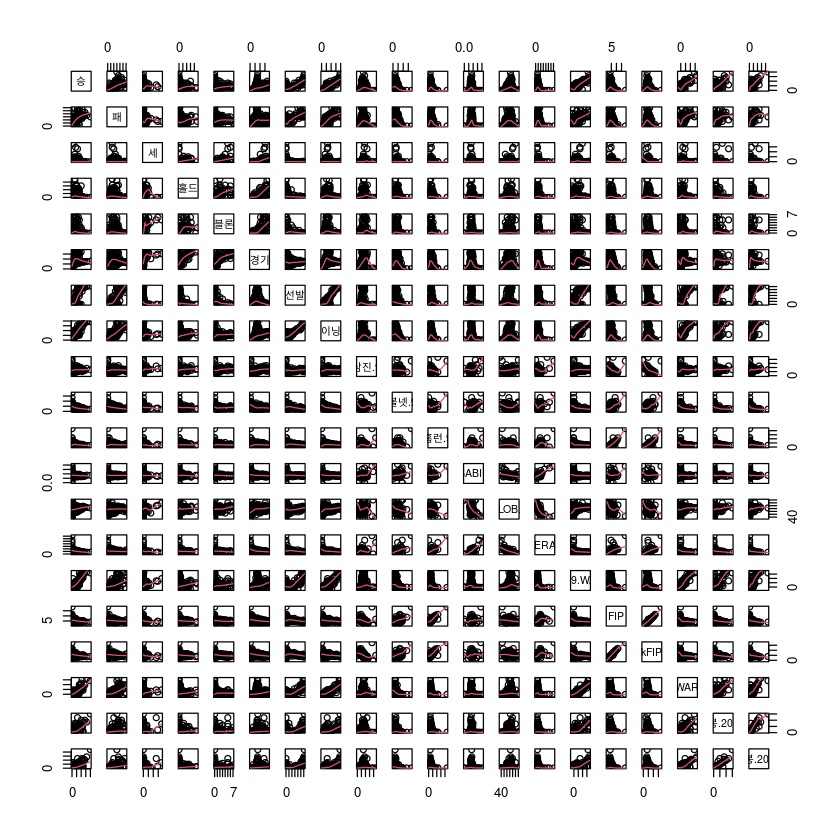

In [21]:
pairs(dt,panel=panel.smooth)

-   수치형 데이터들끼리의 상관계수 확인..

In [22]:
dt_numeric <- dt[, sapply(dt, is.numeric)]
cor_matrix <- cor(dt_numeric)
print(round(cor_matrix,2))


              승    패    세  홀드  블론  경기  선발  이닝 삼진.9 볼넷.9 홈런.9
승          1.00  0.71  0.05  0.09  0.11  0.40  0.77  0.91   0.08  -0.40  -0.12
패          0.71  1.00  0.07  0.10  0.12  0.34  0.77  0.83   0.03  -0.39  -0.06
세          0.05  0.07  1.00  0.11  0.61  0.43 -0.18  0.02   0.17  -0.13  -0.07
홀드        0.09  0.10  0.11  1.00  0.49  0.72 -0.29  0.02   0.19  -0.15  -0.08
블론        0.11  0.12  0.61  0.49  1.00  0.63 -0.26  0.01   0.19  -0.14  -0.06
경기        0.40  0.34  0.43  0.72  0.63  1.00 -0.04  0.38   0.19  -0.36  -0.11
선발        0.77  0.77 -0.18 -0.29 -0.26 -0.04  1.00  0.89  -0.06  -0.31  -0.06
이닝        0.91  0.83  0.02  0.02  0.01  0.38  0.89  1.00   0.04  -0.45  -0.11
삼진.9      0.08  0.03  0.17  0.19  0.19  0.19 -0.06  0.04   1.00   0.11   0.22
볼넷.9     -0.40 -0.39 -0.13 -0.15 -0.14 -0.36 -0.31 -0.45   0.11   1.00   0.30
홈런.9     -0.12 -0.06 -0.07 -0.08 -0.06 -0.11 -0.06 -0.11   0.22   0.30   1.00
BABIP      -0.17 -0.13 -0.09 -0.10 -0.11 -0.24 -0.10 -0.19   0.46   0.28   0.3

# 다중공산성 해결 방법

## VIF계수가 높은 변수 제거

### model2(Vif 10 이상인 변수 제거)

In [23]:
model2 <- lm(연봉.2018. ~ .-경기-선발-이닝-삼진.9-볼넷.9-홈런.9-ERA-RA9.WAR-FIP-kFIP, dt)
summary(model2)

In [24]:
vif(model2)

-   model1에서 다중공산성이 높았던 변수들을 제외하고 lm을 돌렸더니,
    회귀모형은 유의하게 나왔고 R^2값도 91%로 높게 나왔지만 model1보다는
    R^2값이 조금 적게 나왔다.

-   다중공산성이 높은 변수를 제외하는 것은 다른 것들도 확인을 해보아야
    한다.

### VIF제거시 고려사항

-   1.  VIF계수가 높은 피처 우선 제거하되, FIP, kFIP와 같이 유사한
        변수들은 두개 중에서 하나만 제거해보자.

In [25]:
model3 <- lm(연봉.2018. ~ .-FIP, dt)
summary(model3)

In [26]:
vif(model3)

-   VIF계수가 가장 높았떤 FIP를 제거하니 전체적으로 VIF값들이 많이
    감소했다. 볼넷의 경우 50에서 9로 감소함

In [27]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝, dt)
summary(model3)
vif(model3)

-   그 다음 vif계수값이 높은 ’이닝’을 제거했다.

In [28]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP, dt)
summary(model3)
vif(model3)

-   KFIP제거

In [29]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP-RA9.WAR, dt)
summary(model3)
vif(model3)

In [30]:
model3 <- lm(연봉.2018. ~ .-FIP-이닝-kFIP-RA9.WAR-선발, dt)
summary(model3)
vif(model3)

-   유의미한 변수는 ’WAR’과 ’연봉(2017)’이다.

## 정규화

### normalize

In [31]:
normalize <- function(x) {
  return((x - mean(x)) / sd(x))
}

In [32]:
df_normalized <- as.data.frame(lapply(dt, normalize))

In [33]:
head(df_normalized)

In [34]:
model4 <- lm(연봉.2018. ~ ., df_normalized)
summary(model4)

In [35]:
threshold <- 10

In [36]:
high_vif_vars <- ㅍget_high_vif_variables(model4, threshold)
print(high_vif_vars)

 [1] "경기"    "선발"    "이닝"    "삼진.9"  "볼넷.9"  "홈런.9"  "ERA"    
 [8] "RA9.WAR" "FIP"     "kFIP"   

In [37]:
vif(model4)

In [38]:
### 

## 변수선택

### model3(AIC)

`-` AIC(Step)

In [39]:
m0 = lm(연봉.2018. ~ 1, data = dt)

In [40]:
model3 = step(
 m0,
 scope = 연봉.2018. ~연봉.2017.+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "both")

Start:  AIC=3144.3
연봉.2018. ~ 1

             Df  Sum of Sq        RSS    AIC
+ 연봉.2017.  1 1.2511e+11 1.9445e+10 2841.4
+ WAR         1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR     1 7.9230e+10 6.5326e+10 3025.6
+ 승          1 7.3377e+10 7.1179e+10 3038.6
+ 이닝        1 6.2759e+10 8.1797e+10 3059.8
+ 선발        1 4.5409e+10 9.9147e+10 3089.0
+ 패          1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9      1 1.5661e+10 1.2890e+11 3128.9
+ kFIP        1 1.2591e+10 1.3197e+11 3132.4
+ FIP         1 1.1403e+10 1.3315e+11 3133.8
+ ERA         1 6.7332e+09 1.3782e+11 3139.1
+ 세          1 6.4461e+09 1.3811e+11 3139.4
+ 경기        1 6.3714e+09 1.3819e+11 3139.4
+ LOB.        1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9      1 1.9575e+09 1.4260e+11 3144.2
<none>                     1.4456e+11 3144.3
+ 삼진.9      1 1.5567e+09 1.4300e+11 3144.7
+ BABIP       1 1.5139e+09 1.4304e+11 3144.7
+ 블론        1 1.3815e+09 1.4318e+11 3144.8
+ 홀드        1 4.3499e+07 1.4451e+11 3146.3

Step:  AIC=2841.38
연봉.2018. ~ 연봉.2017.

  

#### summary

In [41]:
summary(model3)

-   AIC를 이용하면 최종 모형은 “연봉.2018. ~ 연봉.2017. + WAR +
    kFIP+승+이닝” 이다.

In [42]:
vif(model3)

연봉.2018. ~ 연봉.2017. + WAR + kFIP + 승 + 이닝

### 후진

In [43]:
model_back = step(model1, direction = "backward")
summary(model_back)

Start:  AIC=2775.03
연봉.2018. ~ +WAR + 연봉.2017.

             Df  Sum of Sq        RSS    AIC
<none>                     1.2403e+10 2775.0
- WAR         1 7.0421e+09 1.9445e+10 2841.4
- 연봉.2017.  1 4.1619e+10 5.4022e+10 2996.7

In [44]:
vif(model_back)

연봉.2018. ~ 승 + 경기 + 선발 + WAR + 연봉.2017.

### 전진

In [45]:
m0 = lm(연봉.2018. ~ 1, data = dt)

In [46]:
model_forward = step(
 m0,
 scope = 연봉.2018. ~연봉.2017.+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "forward")
summary(model_forward)

Start:  AIC=3144.3
연봉.2018. ~ 1

             Df  Sum of Sq        RSS    AIC
+ 연봉.2017.  1 1.2511e+11 1.9445e+10 2841.4
+ WAR         1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR     1 7.9230e+10 6.5326e+10 3025.6
+ 승          1 7.3377e+10 7.1179e+10 3038.6
+ 이닝        1 6.2759e+10 8.1797e+10 3059.8
+ 선발        1 4.5409e+10 9.9147e+10 3089.0
+ 패          1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9      1 1.5661e+10 1.2890e+11 3128.9
+ kFIP        1 1.2591e+10 1.3197e+11 3132.4
+ FIP         1 1.1403e+10 1.3315e+11 3133.8
+ ERA         1 6.7332e+09 1.3782e+11 3139.1
+ 세          1 6.4461e+09 1.3811e+11 3139.4
+ 경기        1 6.3714e+09 1.3819e+11 3139.4
+ LOB.        1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9      1 1.9575e+09 1.4260e+11 3144.2
<none>                     1.4456e+11 3144.3
+ 삼진.9      1 1.5567e+09 1.4300e+11 3144.7
+ BABIP       1 1.5139e+09 1.4304e+11 3144.7
+ 블론        1 1.3815e+09 1.4318e+11 3144.8
+ 홀드        1 4.3499e+07 1.4451e+11 3146.3

Step:  AIC=2841.38
연봉.2018. ~ 연봉.2017.

  

In [47]:
vif(model_forward)

연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 승 + 이닝

## PCA(주성분분석)

-   서로 상관성이 높은 변수들의 선형 결합으로 만들어 기존의 상관성이
    높은 변수들을 요약, 축소하는 기법

In [48]:
dt2 <- dt[,1:19] # 설명변수

In [49]:
dt3 <- dt[,20] # 종속변수

In [50]:
procomp.result2 <- prcomp(dt2, center=T, scale=T)
summary(procomp.result2)

In [51]:
dt.pca <- princomp(dt2, cor=TRUE)

In [52]:
summary(dt.pca)

-   제 1주성분과 제6주성분까지의 누적 분산비율은 대략 85.71%로 6개의
    주성분 변수를 활용해 전체 데이터의 85.71%를 설명할 수 있다.

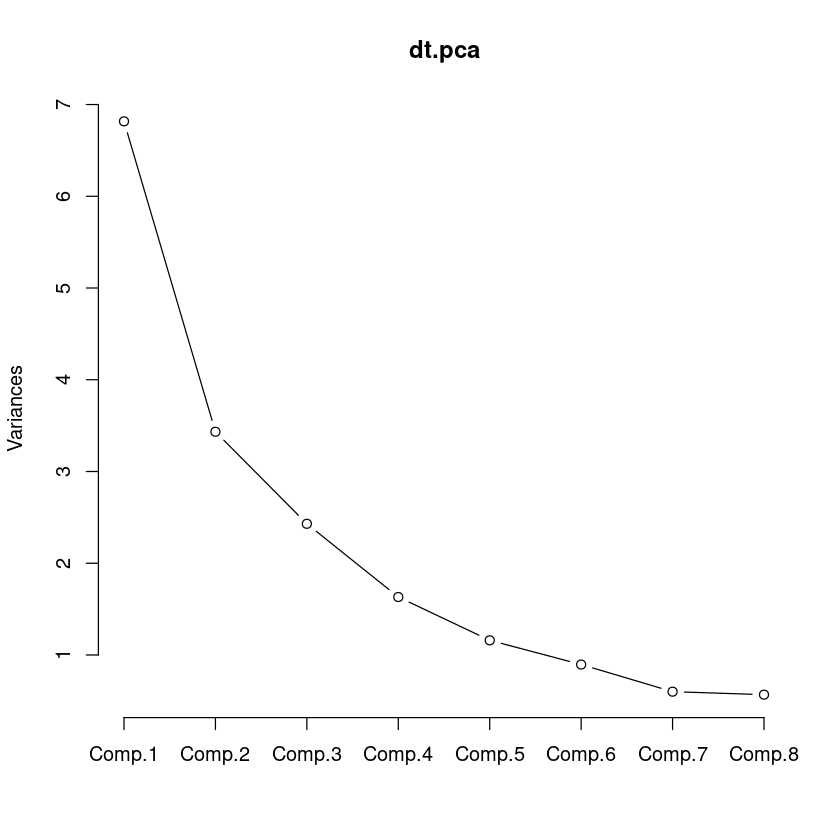

In [53]:
screeplot(dt.pca, npcs=8, type="lines")

-   주성분들에 의해 설명되는 변동 비율

In [54]:
loadings(dt.pca)

# 능형회귀

In [55]:
rfit <- lm.ridge(연봉.2018.~., dt, lambda=seq(0.01,20,0.1))

In [56]:
select(rfit) 

In [57]:
round(rfit$coef[,rfit$lam=='4.11'],3)

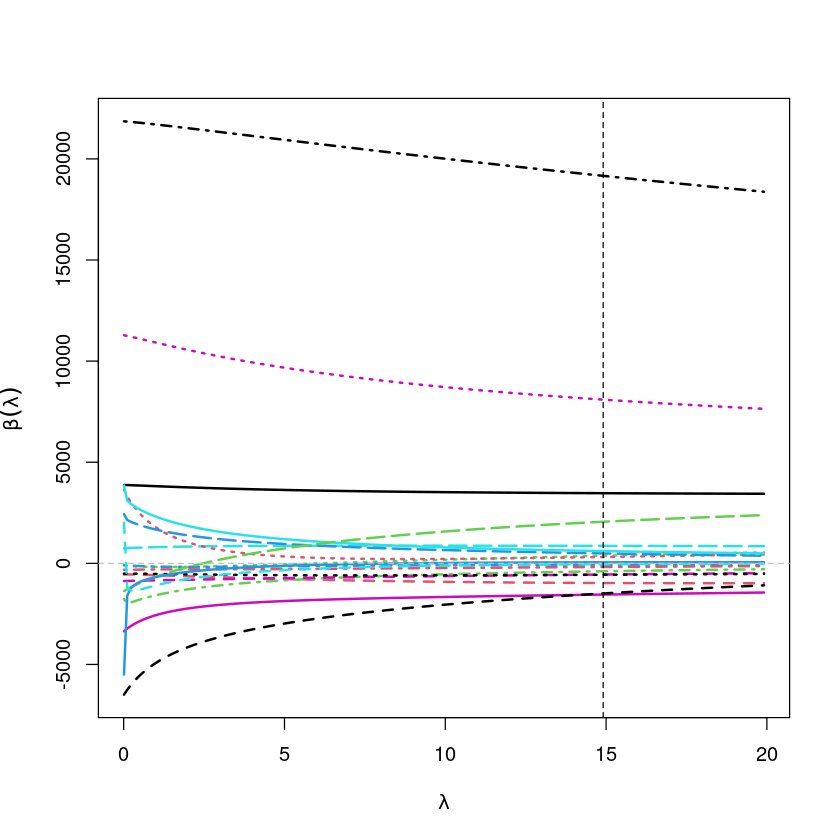

In [58]:
matplot(rfit$lambda, t(rfit$coef), type='l',
        xlab=expression(lambda),
        ylab=expression(bold(beta)(lambda)), lwd=2) 
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)

## glm

In [59]:

X <- model.matrix(연봉.2018.~., dt)[,-1] 
y <- dt$연봉.2018.

In [60]:
head(X)

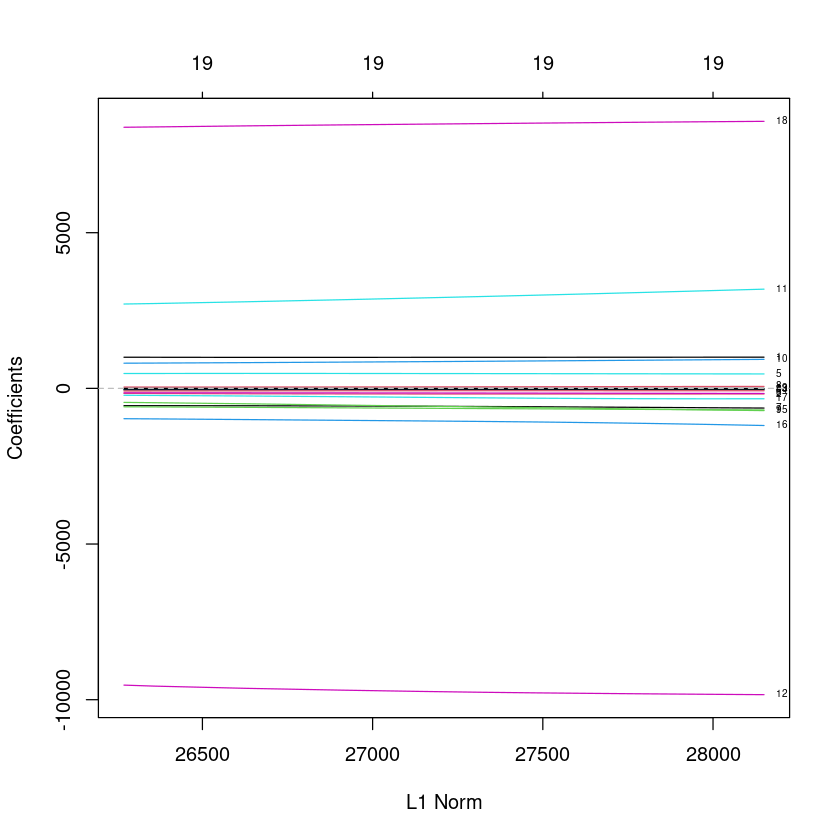

In [61]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0,100,10)) ##ridge : alpha=0 
plot(ridge.fit, label=TRUE)
abline(h=0, col="grey", lty=2)

In [62]:
summary(ridge.fit)

In [63]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

In [64]:
cv.fit

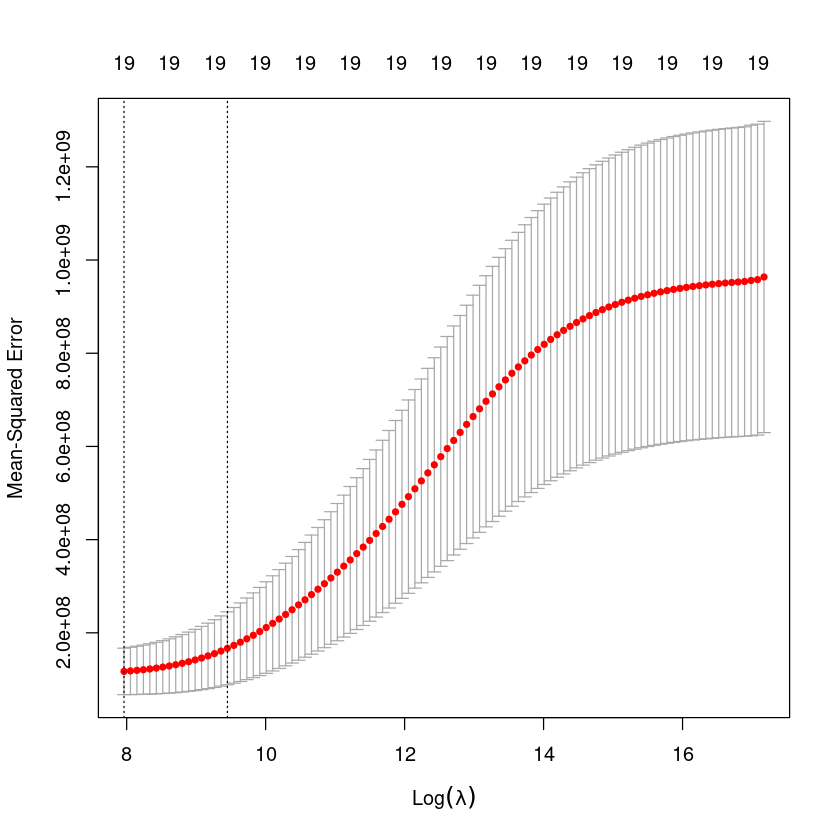

In [65]:
plot(cv.fit)

# 예측

WAR이라는 변수가 다른 설명변수의 곱으로 이루어진 변수니까, 인터넷에서
나오는 WAR계산법에 들어가는 변수들을 제거해보자.(근데 인터넷에 말이 다
다름 ㅎㅎ)

ERA, 이닝수, FIP는 일단 빼야함.

FIP자체가 홈런, 삼진, 볼넷 등의 값인데..

step, 전진: 연봉.2017.이랑 kFIP, 볼넷.9, 삼진.9를ㄴ넣어보자.

연봉.2018. ~ 연봉.2017. + WAR + kFIP + 승 + 이닝

후진: 연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 승 + 이닝

연봉.2018. ~ 연봉.2017. + WAR + 패 + kFIP + 승 + 이닝

In [68]:
X <- data.frame(FIP = dt$"FIP",
                        WAR = dt$"WAR",
                        `볼넷/9` = dt$"볼넷.9",
                        `삼진/9` = dt$"삼진.9",
                        `연봉.2017.` = dt$"연봉.2017.")

In [80]:
y <- picher$"연봉.2018."

In [81]:
set.seed(19)
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- y[train_indices]
y_test <- y[-train_indices]

In [83]:
model <- lm(y_train ~ ., data = cbind(X_train, y_train))

In [84]:
summary(model)

### ㅎ므

In [82]:
X <- data.frame('승' = picher$"승",
                        WAR = picher$"WAR",
                        `경기` = picher$"경기",
                        `선발` = picher$"선발",
                        `연봉.2017.` = picher$"연봉.2017.")

In [85]:
predict_2018_salary <- predict(model, newdata = X)

In [86]:
picher <- cbind(picher, new_col = predict_2018_salary)

In [87]:
head(picher)

In [88]:
predictsalart <- round(predict_2018_salary,0)

In [89]:
result1 <- picher$"선수명"
result2 <- picher$"연봉.2018."
result3 <- predictsalart
result4 <- picher$"연봉.2017."
result <- cbind(result1,result2,result3,result4)

In [90]:
result

# k-fold

In [1]:
X <- dt[c('승', '경기', '선발', 'WAR', '연봉.2017.')]
y <- dt$"연봉.2018."

In [126]:
ctrl <- trainControl(method = "cv", 
                     number = 10, 
                     verboseIter = TRUE)

In [128]:
print(model)

Linear Regression 

152 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 136, 139, 137, 136, 137, 136, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  8775.345  0.9234182  5096.303

Tuning parameter 'intercept' was held constant at a value of TRUE

# createDataPartition

In [129]:

set.seed(20) 
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)  # 80%를 훈련 세트로 사용
X_train <- X[train_indices, ]  # X 훈련 세트
y_train <- y[train_indices]  # y 훈련 세트
X_test <- X[-train_indices, ]  # X 테스트 세트
y_test <- y[-train_indices]  # y 테스트 세트


In [130]:
model <- lm(y_train ~ ., data = cbind(X_train, y_train))

In [131]:
summary(model)

In [132]:
y_pred <- predict(model, newdata = X_test)


In [133]:
y_pred

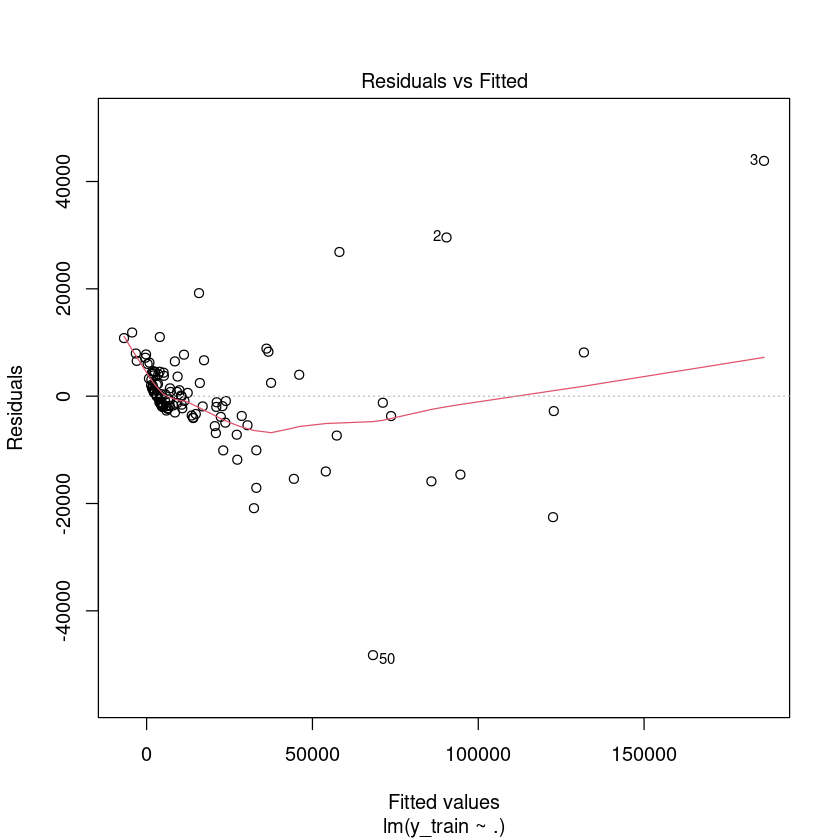

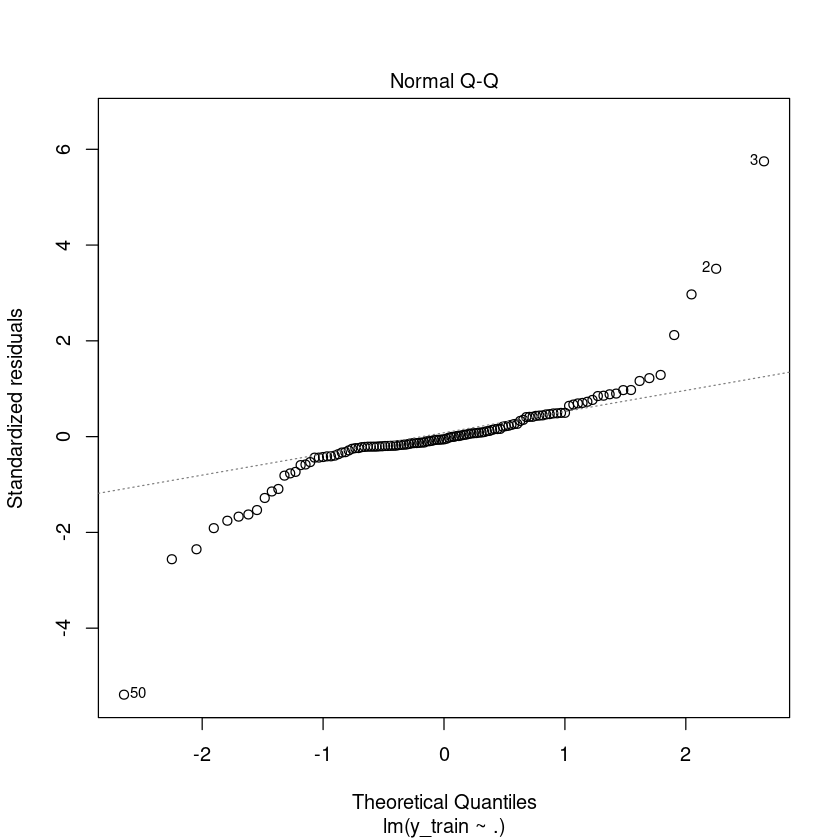

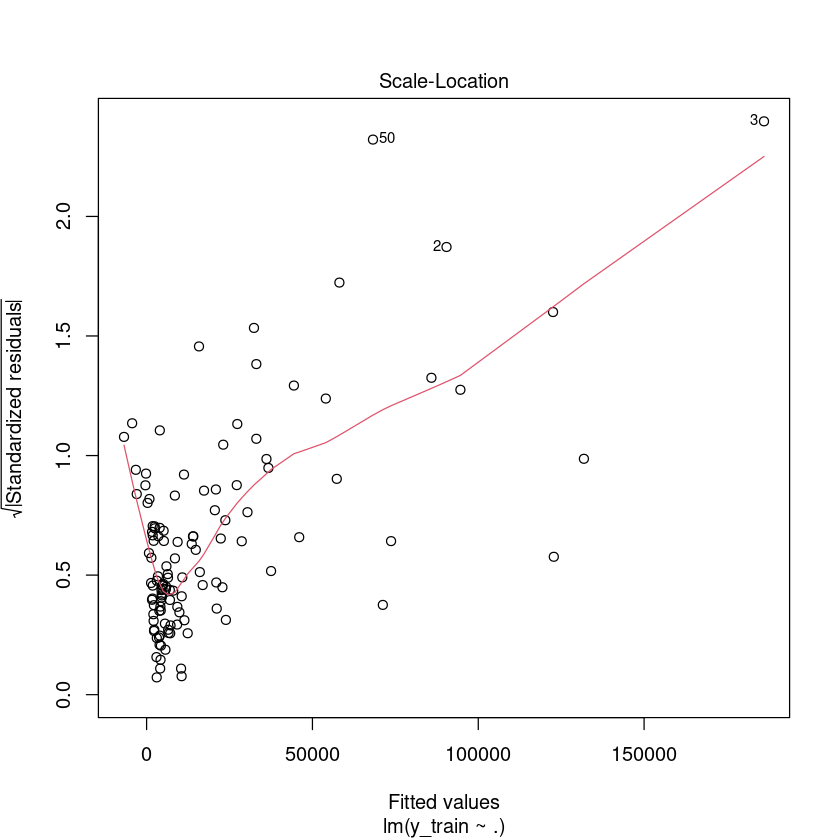

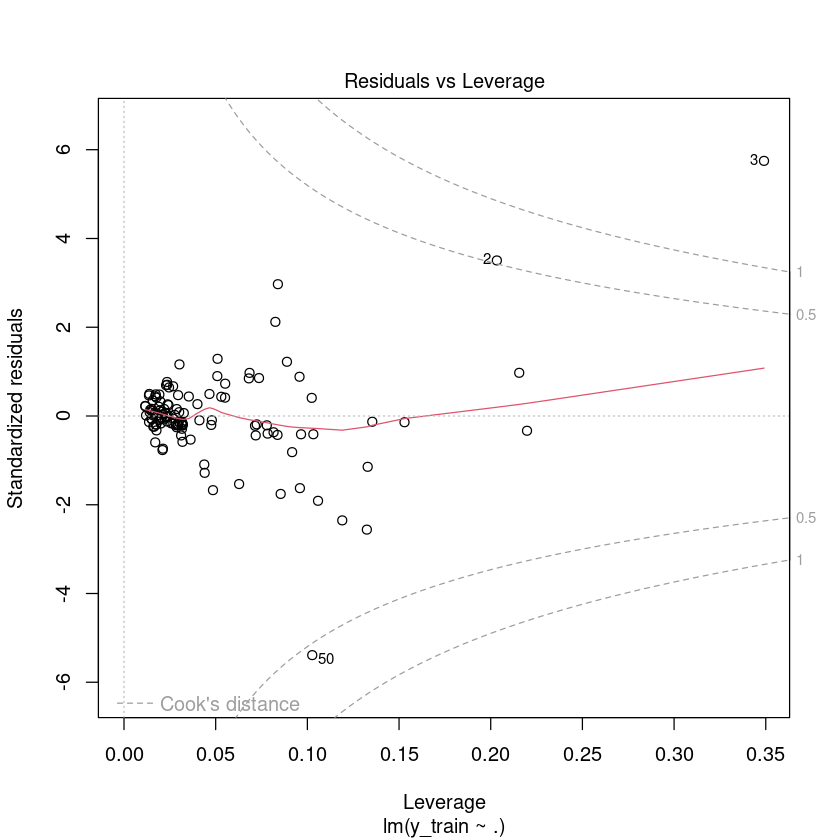

In [103]:
plot(model)

In [104]:
## Shapiro-Wilk Test
## H0 : normal distribution vs. H1 : not H0
shapiro.test(resid(model))

귀무가설 기각

In [92]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [93]:
### 등분산성
## H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)
bptest(model)

잔차 이분산..

In [94]:
bptest(model)

기각..

In [135]:
rmse <- sqrt(mean((y_pred - y_test)^2))
rmse

In [136]:
r_squared <- 1 - sum((y_test - y_pred)^2) / sum((y_test - mean(y_test))^2)
r_squared


In [95]:
y_pred <- predict(model, newdata = X)
y_pred

In [96]:
picher <- cbind(picher, new_data= y_pred)

In [97]:
sorted_picher <- picher[order(-picher$"연봉.2018."), ]
sorted_picher

In [98]:
filtered_df <- picher[picher$"연봉.2018." != picher$"연봉.2017.", ]
filtered_df

In [99]:
df <- filtered_df[,c("선수명","연봉.2018.","new_data","연봉.2017.")]

In [100]:
df

In [101]:
sorted_df <- df[order(df$"연봉.2018.", decreasing = TRUE), ]


In [102]:
sorted_df

# 이상치 제거

In [105]:
picher2 <- picher[-c(1,2,3,6,21,50,98),]

In [106]:
picher2

In [107]:
aa <- lm(연봉.2018. ~ .-팀명-선수명, data=picher2)

In [108]:
summary(aa)

In [ ]:
X <- data.frame('승' = picher$"승",
                        WAR = picher$"WAR",
                        `경기` = picher$"경기",
                        `선발` = picher$"선발",
                        `연봉.2017.` = picher$"연봉.2017.")

In [109]:
X <- picher2[c('승', 'WAR', '경기', '선발', '연봉.2017.')]
y <- picher2$"연봉.2018."

In [110]:

set.seed(20) 
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)  # 80%를 훈련 세트로 사용
X_train <- X[train_indices, ]  # X 훈련 세트
y_train <- y[train_indices]  # y 훈련 세트
X_test <- X[-train_indices, ]  # X 테스트 세트
y_test <- y[-train_indices]  # y 테스트 세트


In [111]:
model2 <- lm(y_train ~ ., data = cbind(X_train, y_train))
summary(model2)

In [112]:
y_pred <- predict(model2, newdata = X_test)


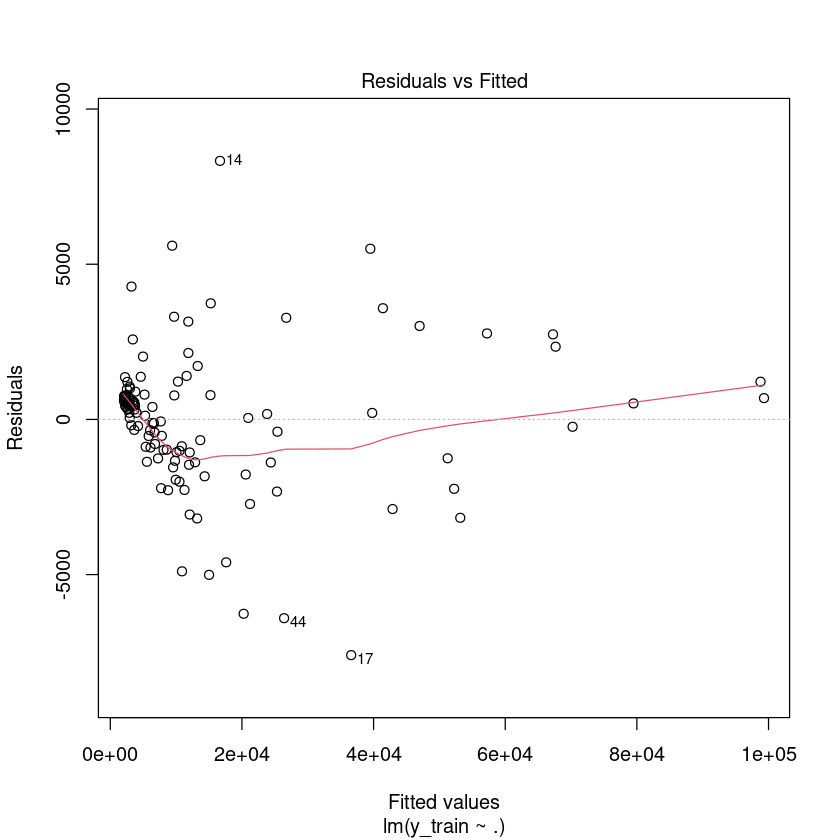

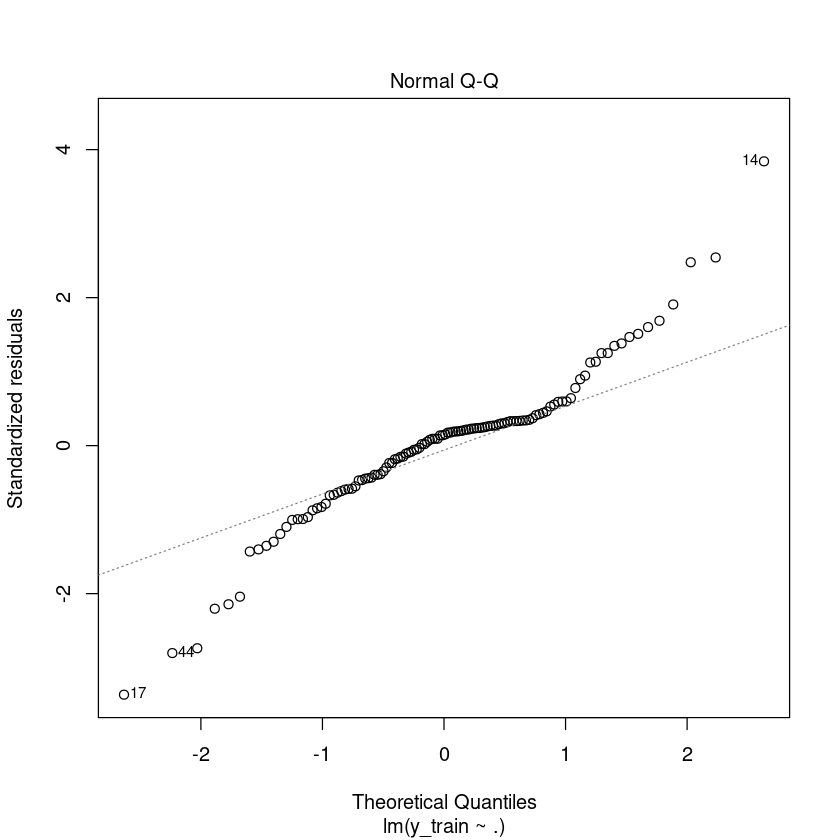

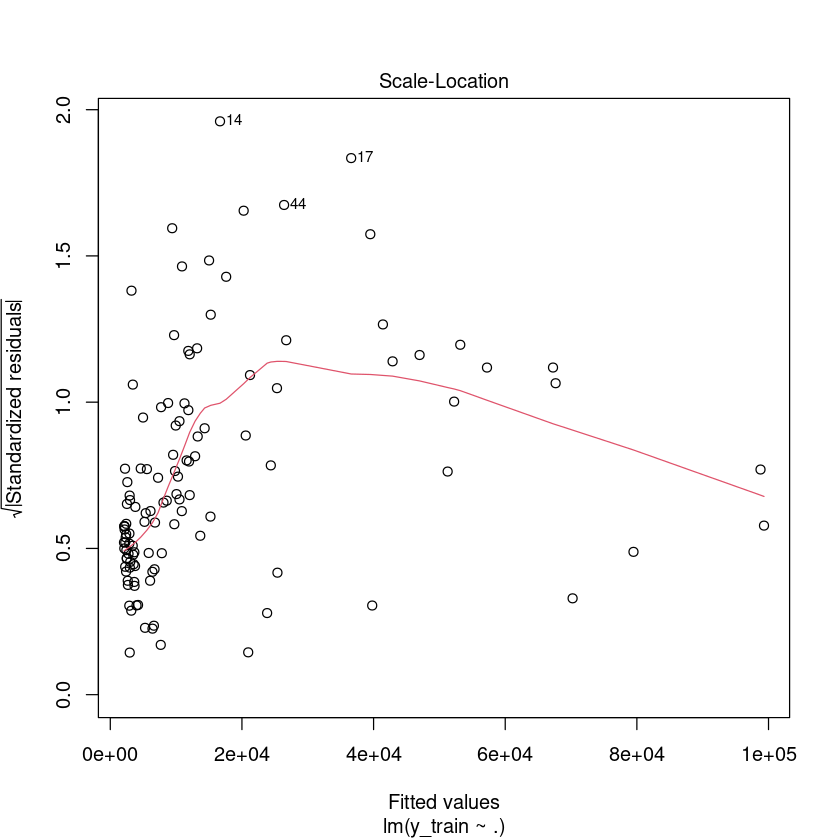

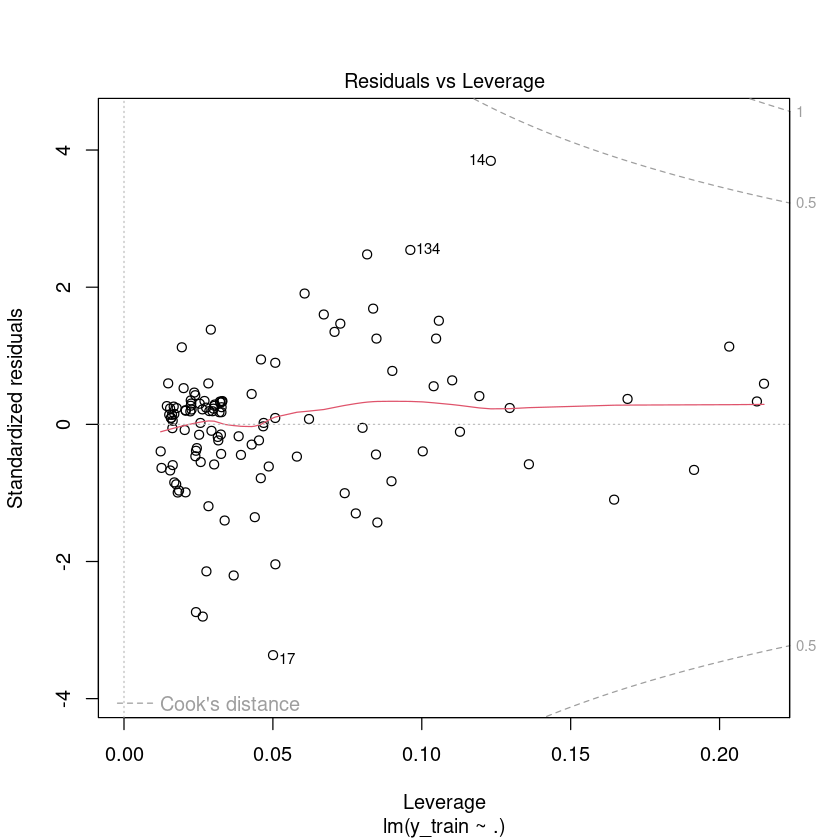

In [114]:
plot(model2)

In [115]:
## Shapiro-Wilk Test
## H0 : normal distribution vs. H1 : not H0
shapiro.test(resid(model2))

귀무가설 기각

In [116]:
library(lmtest)

In [117]:
### 등분산성
## H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)
bptest(model2)

잔차 이분산..

In [119]:
bptest(model2)

In [126]:
y_pred <- predict(model2, newdata = X)

picher2 <- cbind(picher2, new_data= y_pred)

sorted_picher2 <- picher[order(-picher2$"연봉.2018."), ]

filtered_df2 <- picher2[picher2$"연봉.2018." != picher2$"연봉.2017.", ]

df <- filtered_df2[,c("선수명","연봉.2018.","new_data","연봉.2017.")]

sorted_df <- df[order(df$"연봉.2018.", decreasing = TRUE), ]


summary(model2)

In [127]:
sorted_df

다 안되노

# 번외 (WAR을 y로)

In [101]:
model_ <- lm(WAR ~ ., dt)
summary(model_)

In [102]:
vif(model_)

-   WAR로 돌린 모델의 $R^2$값이 연봉으로 돌린 것보다 높게 나왔다.